# Obrabianie danych

In [592]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,8)})

In [593]:
data_frame = pd.read_excel("Desktop/Inżynierka - ankieta (Odpowiedzi).xlsx")

In [594]:
data_frame = data_frame.drop('Sygnatura czasowa', axis=1)

polish_letters_to_english = str.maketrans('ęóąśłżźćń', 'eoaslzzcn')
numbers_to_questions = {}
number = 0
for col in data_frame.columns:
    if isinstance(data_frame[col].values[0], str):
        data_frame[col] = data_frame[col].str.lower()  #wszystko do lowercase
        data_frame[col] = data_frame[col].str.translate(polish_letters_to_english)  #zamiana polskich znakow
        data_frame[col] = data_frame[col].str.strip()  #usuniecie spacji
    numbers_to_questions[number] = col
    data_frame.rename(columns = {col:number}, inplace = True)  #numery zamiast pytan
    number += 1
    
data_frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,student,7+,joliot-curie,lukasz piwowar,bulwar pwr,rektor,indywidualne studia informatyczno matematyczne,pracownie,7,syk - systemy komputerowe,...,alpaki,3,jurdzinski,dyrektor do spraw dydaktycznych,2008-2010,[*] przemyslaw wiesci-wiszewski na zawsze w na...,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
1,student,7+,joliota-curie 14,lukasz piwowar,orzed instytut,rektor,indywidualne studia informatyczno matematyczne,zaklady,6,sk,...,alpaki,4,nie wiem,nie wiem,2004-2006,nie wiem,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
2,student,7+,jliot curie 25,lukasz piwowar,beachbar na bulwarze pwr,rektor,indywidualny system nauczania informatyki i ma...,zaklady,7,sk,...,alpaki,3,jan otol,prodziekan,2000-2002,nie wiem,grunwaldzki,10,pracownia metod numerycznych,whitebook
3,student,7+,nie wiem,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,7,syk,...,alpaki,4,nie wiem,prodziekan,2004-2006,nie wiem,grunwaldzki,9,pracownia grafiki komputerowej,whitebook
4,student,7+,joliot curie 14,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,syk,...,alpaki,4,jurczynski,prodziekan,2004-2006,nie wiem,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,student,1-2,nie wiem,wiktor zychla,wyspa slodowa,rektor,indywidualne studia informatycze i matematyczne,katedry,8,ask,...,alpaki,3,tomasz jurdzinski,nie wiem,2012-2014,nie wiem,grunwaldzki,9,pracownia metod numerycznych,nie wiem
96,student,5-6,curie sklodowskiej,lukasz piwowar,wyspa slodowa!,dziekan,indywidualne studia informatyczno matematyczne,wydzialy,6,systemy komputetowe,...,alpaki,4,nie wiem,nie wiem,2000-2002,nie wiem,grunwaldzki,7,pracownia zlozonosci obliczeniowej i algorytmow,nie wiem
97,student,3-4,fryderyka joliot curie,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,systemy komputerowe,...,alpaki,3,nie wiem,nie wiem,2008-2010,nie wiem,grunwaldzki,9,pracownia zlozonosci obliczeniowej i algorytmow,whitebook
98,student,1-2,fryderyka joliot curie,wiktor zychla,wyspa slodowa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,systemy komputerowe,...,alpaki,4,nie wiem,nie wiem,2004-2006,nie wiem,grunwaldzki,8,pracownia zlozonosci obliczeniowej i algorytmow,whitebook


In [600]:
df = data_frame.copy()
df_plot = df.copy()

In [595]:
numbers_to_questions

{0: 'Jesteś studentem czy pracownikiem Instytutu Informatyki?',
 1: 'Ile ukończyłaś/ukończyłeś semestrów?',
 2: 'Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?',
 3: 'Kto prowadzi przedmiot, na którym nauczysz się tworzyć modele w SketchUpie?',
 4: 'Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?',
 5: 'Kto jest najwyżej w hierarchii władzy uczelnianej?',
 6: 'Jaka jest pełna nazwa skrótowca ISIM?',
 7: 'Na co dzieli się administracyjnie Instytut Informatyki?',
 8: 'Ile przedmiotów obowiązkowych jest na I stopniu studiów (licencjat/inżynier)?',
 9: 'Jakim jednym przedmiotem można zaliczyć efekty kształcenia SO (systemy operacyjne) i ASK (architektura systemów komputerowych)?',
 10: 'Jak nazywa się coroczny, zimowy obóz organizowany przez studentów Instytutu Informatyki?',
 11: 'Gdy student zadeklaruje zadanie, którego nie zrobił, to może dostać za nie dużego…',
 12: 'W jakiej zakładce w USOS sprawdzisz swoje oceny

Text(0.5, 0, 'Jesteś studentem czy pracownikiem Instytutu Informatyki?')

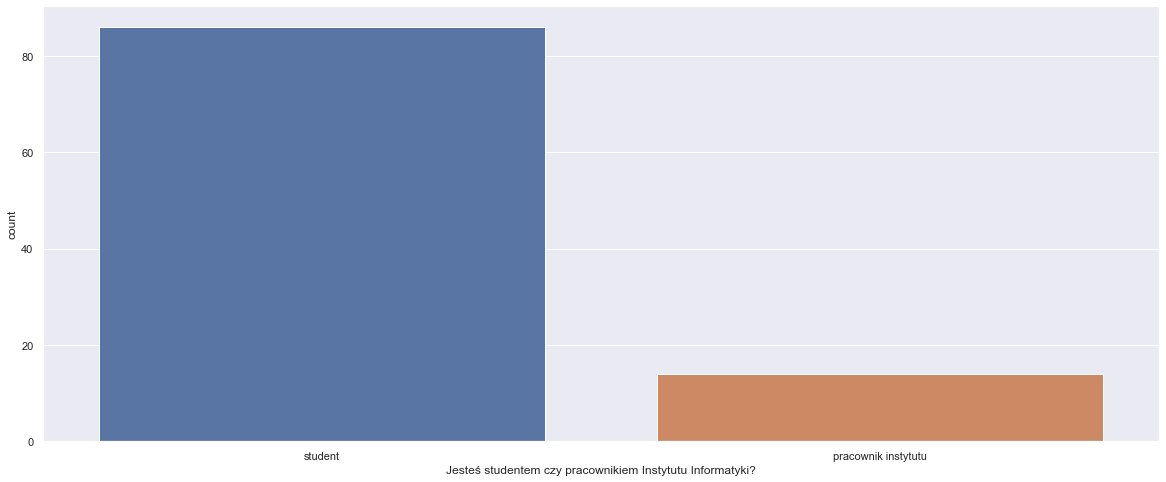

In [596]:
plot = sns.countplot(x=0, data=df)
plot.set_xlabel(numbers_to_questions[0])

In [604]:
keywords = ['joliot', 'curie', '15']
keywords_without_number = ['joliot', 'curie']
number = '15'

for row in df[2]:
    if all(keyword in row for keyword in keywords):
        df[2] = df[2].replace(row, 'joliot-curie 15')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie 15')
    elif all(keyword in row for keyword in keywords_without_number) and number not in row:
        df[2] = df[2].replace(row, 'joliot-curie')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie')
    else:
        df_plot[2] = df_plot[2].replace(row, 'inne')
        
        
df[2].value_counts()

joliot-curie 15                       34
joliot-curie                          28
nie wiem                              27
tego starego komucha 15                1
wstretnego komucha juliot-curie 15     1
juliot-curie ???                       1
curie 15                               1
curie                                  1
joilot curie 15                        1
curie sklodowskiej                     1
joulie curie                           1
jliot curie 25                         1
pierra curie 3                         1
jolint curie 15                        1
Name: 2, dtype: int64

Text(0.5, 0, 'Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?')

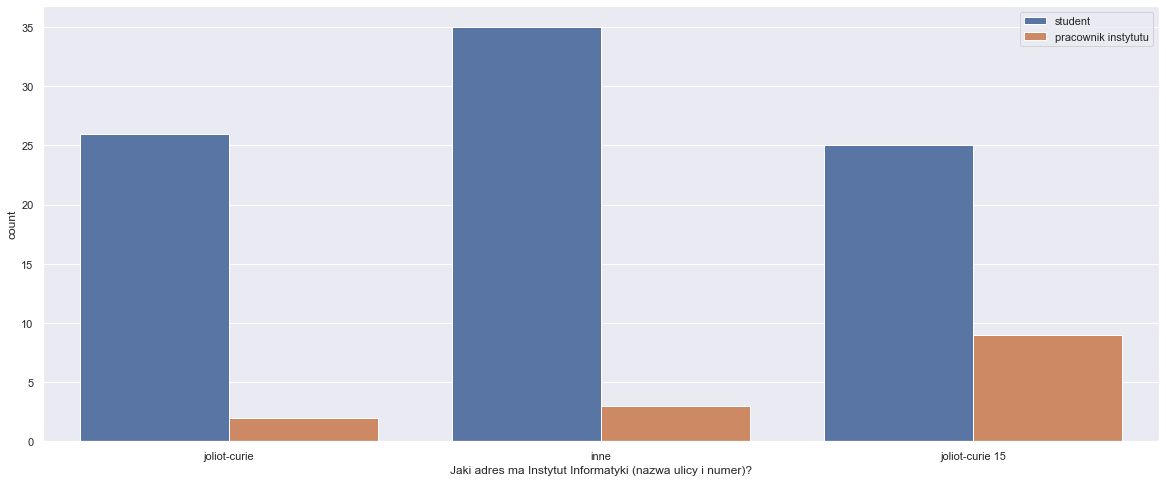

In [605]:
plot2 = sns.countplot(x=2, data=df_plot, hue=0)
plot2.set_xlabel(numbers_to_questions[2])

Text(0.5, 0, 'Kto prowadzi przedmiot, na którym nauczysz się tworzyć modele w SketchUpie?')

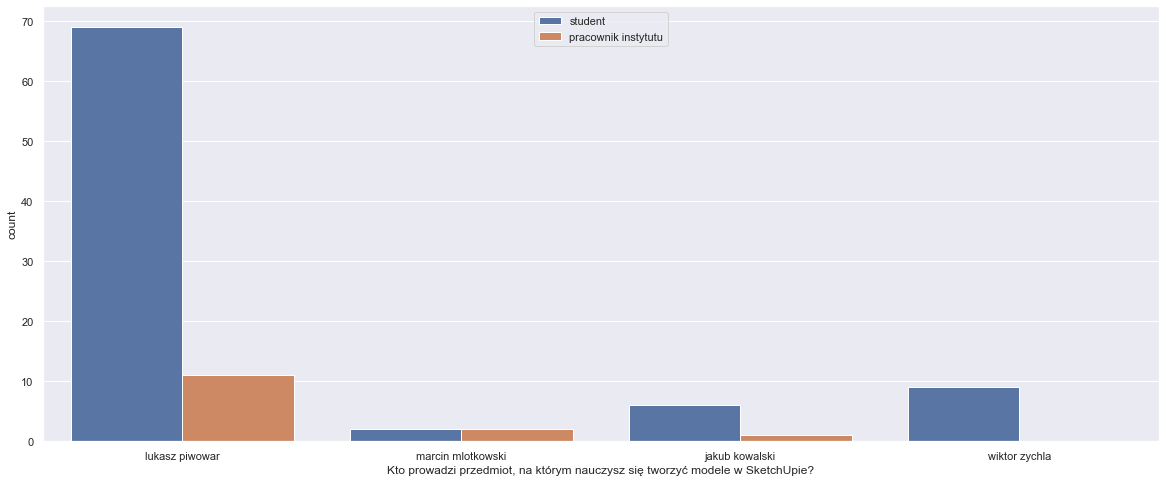

In [606]:
plot3 = sns.countplot(x=3, data=df_plot, hue=0)
plot3.set_xlabel(numbers_to_questions[3])

In [607]:
keywords = ['wyspa', 'slodowa']

for row in df[4]:
    if any(keyword in row for keyword in keywords):
        df[4] = df[4].replace(row, 'wyspa slodowa')
        df_plot[4] = df_plot[4].replace(row, 'wyspa slodowa')
    else:
        df_plot[4] = df_plot[4].replace(row, 'inne')
        
df[4].value_counts()

wyspa slodowa                                                          88
nie wiem                                                                5
nad odra                                                                1
spiz                                                                    1
orzed instytut                                                          1
beachbar na bulwarze pwr                                                1
w poblizu wyspy piasek, ale nazwa tego obszaru wyleciala mi z glowy     1
rynek                                                                   1
bulwar pwr                                                              1
Name: 4, dtype: int64

Text(0.5, 0, 'Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?')

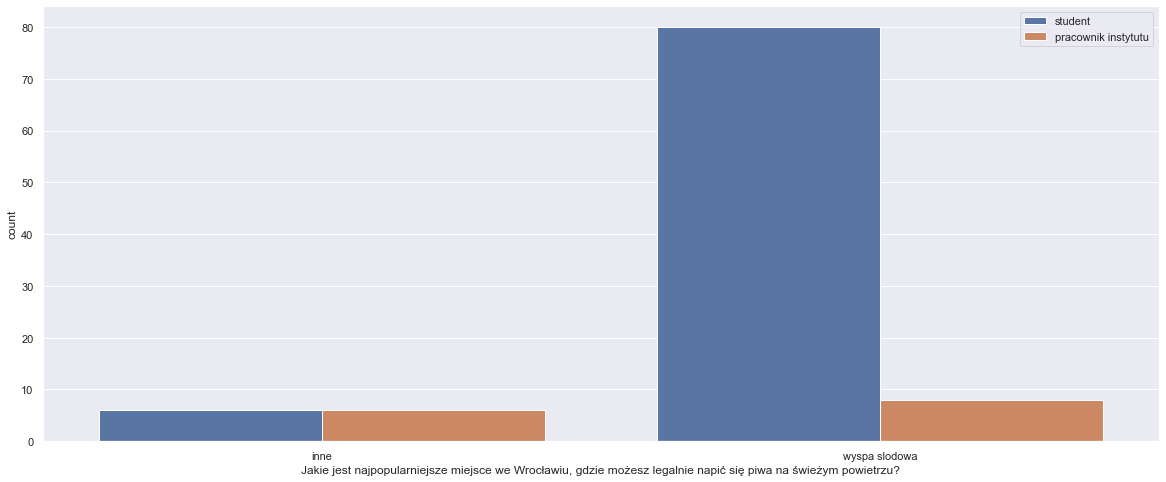

In [608]:
plot4 = sns.countplot(x=4, data=df_plot, hue=0)
plot4.set_xlabel(numbers_to_questions[4])

In [469]:
keywords = ['indywidualne', 'studia', 'informatyczno', 'matematyczne']
keywords_incomplete_answer = ['indywidualne', 'studia', 'inf', 'mat']

for row in df[6]:
    if all(keyword in row for keyword in keywords):
        df[6] = df[6].replace(row, 'indywidualne studia informatyczno-matematyczne')
    elif all(keyword in row for keyword in keywords_incomplete_answer):
        df[6] = df[6].replace(row, 'indywidualne studia inf-mat')  #literowki, skroty
        
df[6].value_counts()

indywidualne studia informatyczno-matematyczne            76
indywidualne studia inf-mat                               11
nie wiem                                                   4
interdyscyplinarne studia informatyczno-matematyczne       3
indywidualne studia costam costam                          1
indyw. studia inf mat                                      1
indywidualny system nauczania informatyki i matematyki     1
informatyka stosowana i matematyka                         1
indywidualnd studia inf mat                                1
interdescyplinarne studia informatyczno matematyczne       1
Name: 6, dtype: int64

In [470]:
keywords = ['syk', 'systemy komputerowe']

for row in df[9]:
    if any(keyword in row for keyword in keywords):
        df[9] = df[9].replace(row, 'syk (systemy komputerowe)')
        
df[9].value_counts()

syk (systemy komputerowe)                  77
nie wiem                                   12
sk                                          5
ask                                         2
sysk                                        1
wiem ze istnieje ale nie pamietam nazwy     1
inzynieria oprogramowania?                  1
systemy komputetowe                         1
Name: 9, dtype: int64

In [471]:
keywords = ['zosia', 'zimowy oboz studentow informatyki']

for row in df[10]:
    if any(keyword in row for keyword in keywords):
        df[10] = df[10].replace(row, 'zosia (zimowy oboz studentow informatyki a)')
        
df[10].value_counts()

zosia (zimowy oboz studentow informatyki a)    96
nie wiem                                        2
zofia                                           1
zoska                                           1
Name: 10, dtype: int64

In [472]:
keywords = ['grzyb']

for row in df[11]:
    if all(keyword in row for keyword in keywords):
        df[11] = df[11].replace(row, 'grzyba')
        
df[11].value_counts()

grzyba          95
grziba           1
atomowego...     1
kurvinoxa        1
grzymbola        1
wala             1
Name: 11, dtype: int64

In [473]:
keywords_aisd = ['aisd', 'algorytmy i struktury danych']
keywords_md = ['dyskretna', 'md']
keywords_an = ['analiza numeryczna', 'an', 'numerki']

for row in df[13]:
    if any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'aisd, md')
    elif any(keyword in row for keyword in keywords_an) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'an, md')
    elif any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_an):
        df[13] = df[13].replace(row, 'aisd, an')
        
df[13].value_counts()

an, md                                                          42
aisd, md                                                        36
aisd, an                                                         7
nie wiem                                                         5
md                                                               1
projektowanie obiektowe oprogramowania + wszystkie seminarki     1
aisd, jfizo                                                      1
algebra; matematyka dyskretna                                    1
jfizo, eksploracja tekstow czy jakos tak                         1
mdm, metody numeryczne                                           1
jfizo, ml                                                        1
mdm i aids                                                       1
systemy rozproszone, algorytmy online                            1
matematyka dyskretna algebra                                     1
Name: 13, dtype: int64

In [474]:
keywords = ['dziennikarstwo', 'dziennikarstwa', 'dziennikarze', 'dziennikarski', 'idziks']


for row in df[14]:
    if any(keyword in row for keyword in keywords):
        df[14] = df[14].replace(row, 'dziennikarstwa')
        
df[14].value_counts()

dziennikarstwa                    90
matematyczny                       2
nie wiem                           2
dzi*nnikarstwo                     1
komunikacja                        1
dziennnikarstwo                    1
streng geheim                      1
zaden. dzienmikarstwo to kpina     1
instytut matematyki                1
Name: 14, dtype: int64

In [475]:
keywords = ['aisd', 'algorytmy i struktury danych']


for row in df[17]:
    if any(keyword in row for keyword in keywords):
        df[17] = df[17].replace(row, 'aisd')
        
df[17].value_counts()

aisd                            88
nie wiem                         5
aids                             3
algortymy i struktury danych     1
logik dla informatykow           1
algebra                          1
metody programowania             1
Name: 17, dtype: int64

In [476]:
keywords = ['polaka']


for row in df[19]:
    if any(keyword in row for keyword in keywords):
        df[19] = df[19].replace(row, 'Benedykta Polaka')
        
df[19].value_counts()

nie wiem               62
Benedykta Polaka       32
wincentego pola         1
joulie curie            1
joliot-curie...?        1
tego drugiego curie     1
joliota-curie           1
joliot-curie            1
Name: 19, dtype: int64

In [477]:
keywords = ['bravo']


for row in df[20]:
    if any(keyword in row for keyword in keywords):
        df[20] = df[20].replace(row, 'Bravo')
        
df[20].value_counts()

Bravo                                            59
nie wiem                                         31
brawo                                             2
pizza hut                                         2
benedykta polaka                                  1
marco                                             1
jakas na b to chyba byla, niedaleko biedronki     1
remont                                            1
brawo!                                            1
la vida lokal, slice of heaven                    1
Name: 20, dtype: int64

In [478]:
keywords = ['kolo', 'studentow', 'inf']


for row in df[21]:
    if all(keyword in row for keyword in keywords):
        df[21] = df[21].replace(row, 'kolo studentow informatyki')
        
df[21].value_counts()

kolo studentow informatyki           84
nie wiem                              7
klub studentow informatyki            4
kolko studentow informatyki           1
kolesiostwo studentow informatyki     1
koo studentow informatyki             1
klub zabawy                           1
klub sympatykow informatyki           1
Name: 21, dtype: int64

In [479]:
keywords = ['jma', 'marcinkowski']


for row in df[24]:
    if any(keyword in row for keyword in keywords):
        df[24] = df[24].replace(row, 'jerzy marcinkowski')
        
df[24].value_counts()

jerzy marcinkowski    50
nie wiem              37
tomasz jurdzinski      3
jan otop               3
jurdzinski             2
krzysztof lorys        1
otop(?)                1
seksista i buc         1
jurek                  1
jerzy marcinkowki      1
Name: 24, dtype: int64

In [480]:
keywords = ['plastyczna']


for row in df[26]:
    if all(keyword in row for keyword in keywords):
        df[26] = df[26].replace(row, 'plastyczna')
        
df[26].value_counts()

plastyczna         80
nie wiem           11
platyczna           2
budzik              2
habibi doner xd     1
plastykowa          1
kultowa             1
sloneczna           1
artystyczna         1
Name: 26, dtype: int64

In [481]:
keywords = ['matematyki i informatyki', 'wmi']


for row in df[34]:
    if any(keyword in row for keyword in keywords):
        df[34] = df[34].replace(row, 'wydzial matematyki i informatyki')
        
df[34].value_counts()

wydzial matematyki i informatyki    81
nie wiem                             8
informatyki i matematyki             5
wydzial informatyki i matematyki     3
wydzial matemetyki i informatyki     1
matematyczno informatyczny           1
mat inf                              1
Name: 34, dtype: int64

In [482]:
keywords = ['sieci komputerowe']
keywords_wrong_answer = ['systemy komputerowe']


for row in df[36]:
    if all(keyword in row for keyword in keywords):
        df[36] = df[36].replace(row, 'sieci komputerowe')
    if all(keyword in row for keyword in keywords_wrong_answer):
        df[36] = df[36].replace(row, 'systemy komputerowe')
        
df[36].value_counts()

sieci komputerowe                      55
systemy komputerowe                    30
nie wiem                               14
architektura systemow komputerowych     1
Name: 36, dtype: int64

In [483]:
keywords = ['projektowanie obiektowe oprogramowania']

for row in df[37]:
    if all(keyword in row for keyword in keywords):
        df[37] = df[37].replace(row, 'projektowanie obiektowe oprogramowania')
        
df[37].value_counts()

projektowanie obiektowe oprogramowania                   48
nie wiem                                                 25
programowanie obiektowe oprogramowania                   11
projektowanie oprogramowania obiektowego                  7
programowanie orientowano obiektowo                       1
projektowanie obiektowego oprogramowania                  1
projektowanie obiektowe oprogranowania                    1
obiektowka                                                1
programowanie obiektowe oprogramowania (zychla power)     1
programowanie obiektowe                                   1
cos tam obiektowe                                         1
projektowanie obiektowe oprogramowani                     1
projektowanie zorientowane obiekotowo                     1
Name: 37, dtype: int64

In [484]:
keywords = ['komunikacja', 'czlowiek', 'komputer']

for row in df[38]:
    if all(keyword in row for keyword in keywords):
        df[38] = df[38].replace(row, 'komunikacja czlowiek-komputer')

df[38].value_counts()

komunikacja czlowiek-komputer    71
nie wiem                         25
komunikacji czlowiek komputer     2
hci                               1
komunikacja czlowiek kumputer     1
Name: 38, dtype: int64

In [485]:
keywords_first = ['rachunek']
keywords_second = ['prawdopodobienstwa', 'pp', 'prwd', 'pstwa', 'prawd']
keywords_third = ['statystyka', 'statystyki']

for row in df[39]:
    if (any(keyword in row for keyword in keywords_first) and 
        any(keyword in row for keyword in keywords_second) and 
        any(keyword in row for keyword in keywords_third)):
        df[39] = df[39].replace(row, 'rachunek prawdopodobienstwa i statystyka')

df[39].value_counts()

rachunek prawdopodobienstwa i statystyka    89
nie wiem                                     9
rachunek prawdopodobienstwa                  1
rachunek orawdopodobienstwa i statystyka     1
Name: 39, dtype: int64

In [486]:
#chyba juz nie gra sie na testowaniu gier (pytanie do wywalenia?)
keywords = ['testowanie gier', 'tg']

for row in df[42]:
    if any(keyword in row for keyword in keywords):
        df[42] = df[42].replace(row, 'testowanie gier')

df[42].value_counts()

testowanie gier                                          57
nie wiem                                                 29
sztuczna inteligencja                                     3
ai4games                                                  2
ai4games (?)                                              1
kazdym                                                    1
pgk? unity?                                               1
sztuczna inteligencja w grach                             1
kazdym zeby nie pasc psychicznie na tej uczelni           1
unity; na pewno nie na testowaniu gier                    1
praktycznie kazdym                                        1
niestety juz sie nie gra w gry na testowaniu gier :'(     1
tertowanie programowania                                  1
Name: 42, dtype: int64

In [487]:
keywords = ['most grunwaldzki']

for row in df[43]:
    if any(keyword in row for keyword in keywords):
        df[43] = df[43].replace(row, 'most grunwaldzki')

df[43].value_counts()

most grunwaldzki    82
nie wiem            16
katedra              1
most gruwaldzki      1
Name: 43, dtype: int64

In [488]:
keywords = ['nauki', 'szkolnictwa wyzszego']
keywords_wrong_answer_first = ['edukacji', 'nauki']
keywords_wrong_answer_second = ['edukacji', 'szkolnictwa wyzszego']

for row in df[44]:
    if all(keyword in row for keyword in keywords):
        df[44] = df[44].replace(row, 'ministerstwo nauki i szkolnictwa wyzszego')
    if all(keyword in row for keyword in keywords_wrong_answer_first):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i nauki')
    if all(keyword in row for keyword in keywords_wrong_answer_second):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i szkolnictwa wyzszego')

df[44].value_counts()

nie wiem                                        37
ministerstwo edukacji i nauki                   18
ministerstwo edukacji i szkolnictwa wyzszego     8
ministerstwo edukacji                            8
szkolnictwa wyzszego                             6
ministerstwo nauki i szkolnictwa wyzszego        5
edukacji                                         4
edukacji narodowej                               2
ministerstwo nauki                               2
ministerstwo czarnka                             1
ministerstwo sledzia i wodki                     1
men                                              1
nauki i kultury                                  1
mein                                             1
ministerstwo szkolnictwa wyzszego                1
ministerstwo oswiaty                             1
ministerstwo edukacji narodowej                  1
ministerstwo wodki i sledzia                     1
co                                               1
Name: 44, dtype: int64

In [489]:
keywords_polka = ['polka', 'polki', 'pulka', 'poleczki', 'poleczka']
keywords_szafka = ['szafka', 'szafeczki']

for row in df[46]:
    if any(keyword in row for keyword in keywords_polka):
        df[46] = df[46].replace(row, 'polka')
    if any(keyword in row for keyword in keywords_szafka):
        df[46] = df[46].replace(row, 'szafka')

df[46].value_counts()

nie wiem              41
polka                 39
szafka                 7
golebnik               6
regal                  2
no na listy no         1
lawka                  1
karmnik? xd            1
pigeon hole            1
to ma jakas nazwe?     1
Name: 46, dtype: int64

In [490]:
keywords = ['system', 'komunikacji','odleglosc', 'student']

for row in df[49]:
    if all(keyword in row for keyword in keywords):
        df[49] = df[49].replace(row, 'system komunikacji na odleglosc ze studentami')

df[49].value_counts()

nie wiem                                              46
system komunikacji na odleglosc ze studentami         31
system komunikacji ogolno studenckiej                  2
system komunikacji ze studentami                       2
system ksztalcenia na odleglosc studentow              2
system komunikacji                                     2
system komunikacji na odelglosc ze studentami          1
system komunikacji ? studentem                         1
system ksztalcenia na odleglosc                        1
system komunikacji okolo studenckiej                   1
system ksztalcenia studentow na odleglosc?             1
system ksztalcenia na odleglosc?                       1
system komunikacji ogolnouczelnianej ze studentami     1
system komunikacji ...                                 1
system komunikacji ??? student (>)                     1
system komunikacji [...] studentow?                    1
system komunikacji i organizacji studenckiej           1
system komunikacji o.... studen

In [491]:
keywords = ['mp', 'metody programowania']

for row in df[50]:
    if any(keyword in row for keyword in keywords):
        df[50] = df[50].replace(row, 'metody programowania')

df[50].value_counts()

metody programowania       88
nie wiem                    7
lisp                        1
chyba programowanie         1
programowanie funkcyjne     1
metody prog                 1
metody programowaniq        1
Name: 50, dtype: int64

In [492]:
keywords = ['jurdzinski', 'tju']

for row in df[53]:
    if any(keyword in row for keyword in keywords):
        df[53] = df[53].replace(row, 'tomasz jurdzinski')

df[53].value_counts()

tomasz jurdzinski     63
nie wiem              24
mabi                   2
jan otop               2
wojciech fiolka        1
jarudzinski            1
tomek                  1
jurczynski             1
jurdzynski             1
tomasz jutdzinski      1
marcinkowski           1
jan otol               1
jerzy marcinkowski     1
Name: 53, dtype: int64

In [493]:
keywords = ['prodziekan']

for row in df[54]:
    if any(keyword in row for keyword in keywords):
        df[54] = df[54].replace(row, 'prodziekan')

df[54].value_counts()

prodziekan                           58
nie wiem                             37
tomasz jurdzinski                     2
dyrektor do spraw dydaktycznych       1
biernacka malgorzata                  1
zastepca dziekana ds. studenckich     1
Name: 54, dtype: int64

In [494]:
keywords = ['olkiewicz']
keywords_wiszewski = ['wiszewski']

for row in df[56]:
    if any(keyword in row for keyword in keywords):
        df[56] = df[56].replace(row, 'robert olkiewicz')
    if any(keyword in row for keyword in keywords_wiszewski):
        df[56] = df[56].replace(row, 'przemyslaw wiszewski')
        
df[56].value_counts()

nie wiem                                                                            80
robert olkiewicz                                                                     9
przemyslaw wiszewski                                                                 4
marek                                                                                2
pomidor                                                                              1
mamy teraz?                                                                          1
nie wiem ale byl czlonkiem jakiegos stworzyszenia powiazanego z chrzescijanami:(     1
a wez mnie nie denerwuj                                                              1
to my mamy juz rektora? xdd                                                          1
Name: 56, dtype: int64

In [502]:
keywords = ['whitebook', 'white book', 'weißbuch', 'biala ksiazka', 'biala ksiazeczka']
keywords_lajtbuk = ['lajtbuk', 'lajt buk']

for row in df[60]:
    if any(keyword in row for keyword in keywords):
        df[60] = df[60].replace(row, 'whitebook')
    if any(keyword in row for keyword in keywords_lajtbuk):
        df[60] = df[60].replace(row, 'lajtbuk')
        
df[60].value_counts()

whitebook    83
nie wiem     11
lajtbuk       3
skrypt        2
biblia        1
Name: 60, dtype: int64

In [503]:
for col in df.columns:
    print(df[col].value_counts())

student                86
pracownik instytutu    14
Name: 0, dtype: int64
7+     27
1-2    22
3-4    22
5-6    15
Name: 1, dtype: int64
joliot-curie 15                       34
joliot-curie                          28
nie wiem                              27
tego starego komucha 15                1
wstretnego komucha juliot-curie 15     1
juliot-curie ???                       1
curie 15                               1
curie                                  1
joilot curie 15                        1
curie sklodowskiej                     1
joulie curie                           1
jliot curie 25                         1
pierra curie 3                         1
jolint curie 15                        1
Name: 2, dtype: int64
lukasz piwowar       80
wiktor zychla         9
jakub kowalski        7
marcin mlotkowski     4
Name: 3, dtype: int64
wyspa slodowa                                                          88
nie wiem                                                                5
na

# Statystyki pracowników

In [496]:
pracownicy = df.loc[df[0] == 'pracownik instytutu']

#pracownicy

In [497]:
for col in pracownicy.columns:
    print(pracownicy[col].value_counts())

pracownik instytutu    14
Name: 0, dtype: int64
Series([], Name: 1, dtype: int64)
joliot-curie 15    9
nie wiem           3
joliot-curie       2
Name: 2, dtype: int64
lukasz piwowar       11
marcin mlotkowski     2
jakub kowalski        1
Name: 3, dtype: int64
wyspa slodowa                                                          8
nie wiem                                                               3
rynek                                                                  1
nad odra                                                               1
w poblizu wyspy piasek, ale nazwa tego obszaru wyleciala mi z glowy    1
Name: 4, dtype: int64
rektor     13
dziekan     1
Name: 5, dtype: int64
indywidualne studia informatyczno-matematyczne          9
interdyscyplinarne studia informatyczno-matematyczne    2
indywidualne studia costam costam                       1
indywidualne studia inf-mat                             1
nie wiem                                                1
Name: 6, dty

# Statystyki studentów

In [498]:
studenci = df.loc[df[0] == 'student']

#studenci

In [499]:
for col in studenci.columns:
    print(studenci[col].value_counts())

student    86
Name: 0, dtype: int64
7+     27
1-2    22
3-4    22
5-6    15
Name: 1, dtype: int64
joliot-curie                          26
joliot-curie 15                       25
nie wiem                              24
tego starego komucha 15                1
wstretnego komucha juliot-curie 15     1
juliot-curie ???                       1
curie 15                               1
curie                                  1
joilot curie 15                        1
curie sklodowskiej                     1
joulie curie                           1
jliot curie 25                         1
pierra curie 3                         1
jolint curie 15                        1
Name: 2, dtype: int64
lukasz piwowar       69
wiktor zychla         9
jakub kowalski        6
marcin mlotkowski     2
Name: 3, dtype: int64
wyspa slodowa               80
nie wiem                     2
orzed instytut               1
beachbar na bulwarze pwr     1
spiz                         1
bulwar pwr                   1
Na